In [17]:
from keras.datasets import cifar10
from keras import layers ,models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(train_image, train_labels), (test_image, test_labels)=cifar10.load_data()

In [3]:
print(train_image.shape)
print(train_labels.shape)
print(test_image.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
train_labels[0]

array([6], dtype=uint8)

In [5]:
class_name=['airplane',
	'automobile',
	'bird',
	'cat',
	'deer',
	'dog',
	'frog',
	'horse',
	'ship',
     'truck']

In [6]:
class_name[train_labels[0][0]]

'frog'

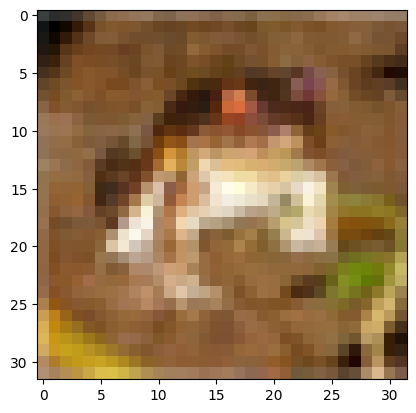

In [7]:
plt.close()
plt.imshow(train_image[0])
plt.show()

In [8]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=(['accuracy']))

In [11]:
history=model.fit(train_image,train_labels,epochs=10,validation_data=(test_image,test_labels))

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7977 - accuracy: 0.3789 - val_loss: 1.4711 - val_accuracy: 0.4647
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3376 - accuracy: 0.5240 - val_loss: 1.3073 - val_accuracy: 0.5498
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1894 - accuracy: 0.5810 - val_loss: 1.1474 - val_accuracy: 0.5882
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0731 - accuracy: 0.6248 - val_loss: 1.0903 - val_accuracy: 0.6232
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9955 - accuracy: 0.6546 - val_loss: 1.0387 - val_accuracy: 0.6463
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9216 - accuracy: 0.6792 - val_loss: 1.0285 - val_accuracy: 0.6514
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8682 - accuracy: 0.6993 - val_loss: 1.0477 -

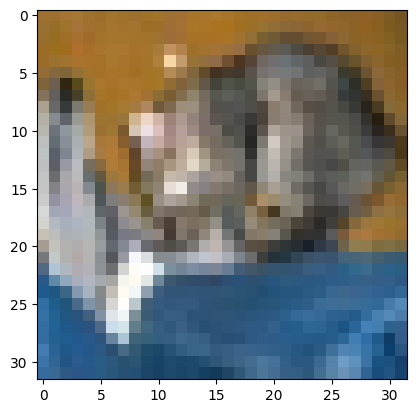

In [12]:
plt.close()
plt.imshow(test_image[0])
plt.show()

In [13]:
out=model.predict(test_image)


313/313 [==============================] - 1s 4ms/step


In [14]:
x=out[0]
x

array([2.2268956 , 0.8613131 , 3.9581437 , 4.924003  , 1.4247544 ,
       4.557862  , 2.5906746 , 0.67028713, 4.312481  , 1.3198984 ],
      dtype=float32)

In [15]:
ind=-1
for i in x:
    ind+=1
    if max(x)==i:
        print(ind)
        print(class_name[ind])

3
cat


In [16]:
import cv2
img=cv2.imread(r'D:\sohrab\github\ai\horse.jpg')
img=cv2.resize(img,(32,32))
img.shape

(32, 32, 3)

In [20]:
img2=np.array([img])
img2.shape

(1, 32, 32, 3)

In [22]:
out2=model.predict(img2)
x2=out2[0]
ind=-1
for i in x2:
    ind+=1
    if max(x2)==i:
        print(ind)
        print(class_name[ind])

1/1 [==============================] - 0s 13ms/step
7
horse


In [23]:
model.save('cnn_model.h5')